Given the dataset, answer the following questions. Note that your analysis does
not need to be done on the full dataset. You can select particular borough(s)
or specific type of properties, or select data based on column values.

Q1 (20 points) Discuss the dataset’s quality and perform the necessary
prepossessing steps to select the dataset for your analysis. Briefly describe
what your target dataset is.

In [3]:
# import the libraries you need, make sure they are installed within your Python env
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import missingno as msno
from scipy.stats import skew, norm
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from yellowbrick.regressor import ResidualsPlot


# the following code ensures that you can see your (print) results for multiple tasks within a coding block
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


pd.options.display.width = None


We will only be using data from Borough 3

In [4]:
# load data and check basic data type information
all_data = pd.read_csv('20to22NYC.csv', low_memory=False)

#Isolate borough 3
all_data = all_data[all_data["BOROUGH"] == 3]

all_data.head(10)

# we can also check the end of the table, why this might help? because sometimes there would be extra content provided by the data author at the end of the table and you keep that as part of the data.
all_data.tail(10)




,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
66035,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6359,70,S1,8684 15TH AVENUE,NaN,11228.0,1.0,1.0,2.0,1933.0,4080.0,1930.0,1,S1,1300000.0,2020-04-28
66036,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360,48,A5,14 BAY 10TH STREET,NaN,11228.0,1.0,0.0,1.0,2513.0,1428.0,1930.0,1,A5,849000.0,2020-03-18
66037,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360,56,A5,30 BAY 10TH STREET,NaN,11228.0,1.0,0.0,1.0,1547.0,1428.0,1930.0,1,A5,75000.0,2020-11-30
66038,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6362,23,A9,43 BAY 11TH STREET,NaN,11228.0,1.0,0.0,1.0,2280.0,1052.0,1901.0,1,A9,0.0,2020-11-04
66039,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6367,24,A9,8645 BAY 16TH STREET,NaN,11214.0,1.0,0.0,1.0,1571.0,1456.0,1935.0,1,A9,830000.0,2020-06-26
66040,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6371,19,A9,79 BAY 20TH STREET,NaN,11214.0,1.0,0.0,1.0,2320.0,1566.0,1930.0,1,A9,0.0,2020-02-21
66041,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6371,60,A9,8620 19TH AVENUE,NaN,11214.0,1.0,0.0,1.0,2417.0,2106.0,1930.0,1,A9,1188000.0,2020-07-20
66042,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6392,65,A2,140 BAY 8 STREET,NaN,11228.0,1.0,0.0,1.0,3222.0,1804.0,1940.0,1,A2,975000.0,2020-01-21
66043,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6392,115,A5,145 BAY 7TH STREET,NaN,11228.0,1.0,0.0,1.0,1448.0,1280.0,1945.0,1,A5,870000.0,2020-10-15
66044,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6399,13,A1,155 BAY 14TH ST,NaN,11214.0,1.0,0.0,1.0,3680.0,936.0,1930.0,1,A1,1250000.0,2020-12-23


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
177493,3,WYCKOFF HEIGHTS,27 FACTORIES,4,3177,15,F4,444 JEFFERSON STREET,NaN,11237.0,0.0,1.0,1.0,9999.0,9000.0,1960.0,4,F4,0.0,2022-12-19
177494,3,WYCKOFF HEIGHTS,27 FACTORIES,4,3177,15,F4,444 JEFFERSON STREET,NaN,11237.0,0.0,1.0,1.0,10000.0,9000.0,1960.0,4,F4,6500000.0,2022-02-22
177495,3,WYCKOFF HEIGHTS,27 FACTORIES,4,3177,25,F4,427 TROUTMAN STREET,NaN,11237.0,0.0,1.0,1.0,9250.0,6900.0,1931.0,4,F4,6500000.0,2022-02-22
177496,3,WYCKOFF HEIGHTS,27 FACTORIES,4,3178,6,F4,7 ST NICHOLAS AVENUE,NaN,11237.0,0.0,1.0,1.0,5700.0,22800.0,1950.0,4,F4,0.0,2022-08-03
177497,3,WYCKOFF HEIGHTS,27 FACTORIES,4,3189,5,F4,29 WYCKOFF AVENUE,NaN,11237.0,0.0,1.0,1.0,11841.0,13300.0,1931.0,4,F4,0.0,2022-12-09
177498,3,WYCKOFF HEIGHTS,27 FACTORIES,4,3290,12,F5,366 HARMAN STREET,NaN,11237.0,0.0,1.0,1.0,2749.0,1340.0,1931.0,4,F5,1250000.0,2022-09-21
177499,3,WYCKOFF HEIGHTS,30 WAREHOUSES,4,3176,15,E1,370 JEFFERSON STREET,NaN,11237.0,0.0,1.0,1.0,15000.0,21000.0,1931.0,4,E1,0.0,2022-03-24
177500,3,WYCKOFF HEIGHTS,41 TAX CLASS 4 - OTHER,4,3248,53,V1,299 STOCKHOLM STREET,NaN,11237.0,0.0,0.0,0.0,2499.0,0.0,1931.0,4,Z9,495000.0,2022-08-15
177501,3,WYCKOFF HEIGHTS,44 CONDO PARKING,4,3280,1133,RP,"369 HARMAN STREET, P3",P3,11237.0,NaN,1.0,1.0,NaN,NaN,2009.0,4,RP,0.0,2022-04-26
177502,3,WYCKOFF HEIGHTS,44 CONDO PARKING,4,3280,1134,RP,"369 HARMAN STREET, P4",P4,11237.0,NaN,1.0,1.0,NaN,NaN,2009.0,4,RP,0.0,2022-04-26


In [5]:
# info is a function provided by pandas. This method prints informaiton about a DataFrame including the index dtype and columns, non-null values, and memory usage, https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html
# more about data types in pandas: https://pandas.pydata.org/docs/user_guide/basics.html#basics-dtypes
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74953 entries, 66035 to 177502
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         74953 non-null  int64  
 1   NEIGHBORHOOD                    74953 non-null  object 
 2   BUILDING CLASS CATEGORY         74953 non-null  object 
 3   TAX CLASS AT PRESENT            74736 non-null  object 
 4   BLOCK                           74953 non-null  int64  
 5   LOT                             74953 non-null  int64  
 6   BUILDING CLASS AT PRESENT       74736 non-null  object 
 7   ADDRESS                         74953 non-null  object 
 8   APARTMENT NUMBER                21303 non-null  object 
 9   ZIP CODE                        74948 non-null  float64
 10  RESIDENTIAL UNITS               63371 non-null  object 
 11  COMMERCIAL UNITS                52653 non-null  object 
 12  TOTAL UNITS                

What are the findings from Step 1 ?

We have 74,953 data objects and 20 attributes.
Attributes with NA VALUES: "TAX CLASS AT PRESENT", "BUILDING CLASS AT PRESENT", "APARTMENT NUMBER", 
"ZIP CODE", "RESIDENTIAL UNITS", "COMMERCIAL UNITS", "TOTAL UNITS", "LAND SQUARE FEET", "GROSS SQUARE FEET",
"YEAR BUILT"

ZIP CODE should be an int64

YEAR BUILT should be int64

SALE PRICE should be int64

SALE DATE can be dateTime


In [6]:
#only look for APARTMENTS
all_data.dropna(subset=["APARTMENT NUMBER"], inplace=True)
all_data.dropna(subset=["YEAR BUILT"], inplace=True)



#convert the float64 into int64
all_data["ZIP CODE"] = all_data["ZIP CODE"].astype(int)
all_data["YEAR BUILT"] = all_data["YEAR BUILT"].astype(int)
all_data["SALE PRICE"] = all_data["SALE PRICE"].astype(int)

#convert SALE DATE dtype to dateTime
all_data['SALE DATE'] = pd.to_datetime(all_data['SALE DATE'], format='%Y-%m-%d')


all_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 17229 entries, 66089 to 177502
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         17229 non-null  int64         
 1   NEIGHBORHOOD                    17229 non-null  object        
 2   BUILDING CLASS CATEGORY         17229 non-null  object        
 3   TAX CLASS AT PRESENT            17197 non-null  object        
 4   BLOCK                           17229 non-null  int64         
 5   LOT                             17229 non-null  int64         
 6   BUILDING CLASS AT PRESENT       17197 non-null  object        
 7   ADDRESS                         17229 non-null  object        
 8   APARTMENT NUMBER                17229 non-null  object        
 9   ZIP CODE                        17229 non-null  int64         
 10  RESIDENTIAL UNITS               15104 non-null  object        
 1

Now, all data has been cleaned up and lots of NULL data removed. The target dataset we have in front of us are all apartment units in BOROUGH 3. 

Q2 (30 points) Suppose you want to analyze the potential recovery of
the NYC real estate market post-COVID19. Ask three questions under
this topic and answer them by performing data visualization and statistical hypothesis test1 on the given dataset. Your questions must be well-motivated, and you should explain why the question would be interesting to answer under the given topic. You can link the given dataset
with external data, e.g., America’s rising mortgage interest rate.

Question 1:

What is the average sale price of apartment units in BOROUGH 3 over time?

Reasoning: Analyzing the average sale price of apartment units in BOROUGH 3 over time can help understand the potential recovery of the real estate market in BOROUGH 3 post-COVID19. We can compare the average sale price before and after the pandemic to see if there is a change in trend.

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Average Sale Price')

Text(0.5, 1.0, 'Average Sale Price of Apartment Units in BOROUGH 3 Over Time')

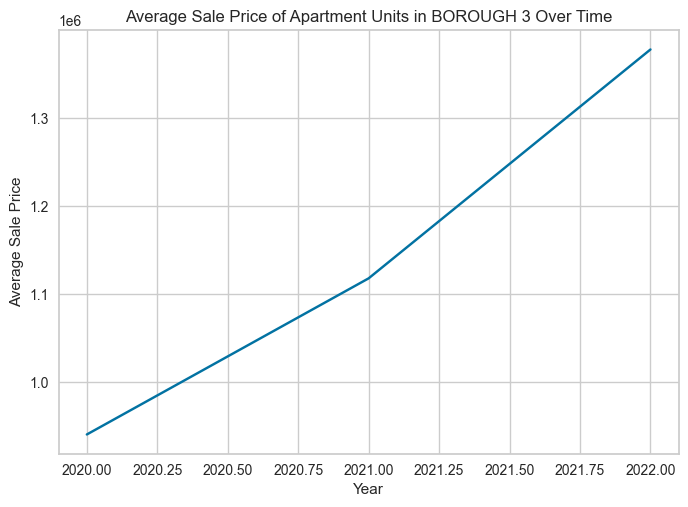

t-statistic: 1.613
p-value: 0.248
The average sale price is not significantly different from the hypothesized mean.


In [7]:
# Extract the year from the sale date
all_data['YEAR'] = all_data['SALE DATE'].dt.year

# Group the data by year and calculate the average sale price for each year
average_sale_price_per_year = all_data.groupby('YEAR')['SALE PRICE'].mean()

# Plot the average sale price per year
plt.plot(average_sale_price_per_year)
plt.xlabel("Year")
plt.ylabel("Average Sale Price")
plt.title("Average Sale Price of Apartment Units in BOROUGH 3 Over Time")
plt.show()

# Perform a one-sample t-test to determine if the average sale price is equal to a hypothesized value (e.g., the mean sale price in the year 2020)
hypothesized_mean = average_sale_price_per_year[2020]
t_statistic, p_value = stats.ttest_1samp(average_sale_price_per_year, hypothesized_mean)

print(f"t-statistic: {t_statistic:.3f}")
print(f"p-value: {p_value:.3f}")

if p_value < 0.05:
  print("The average sale price is significantly different from the hypothesized mean.")
else:
  print("The average sale price is not significantly different from the hypothesized mean.")


Question 2:

Is there a relationship between the year built and the sale price of apartment units in BOROUGH 3?

Reasoning: Analyzing the relationship between the year built and the sale price of apartment units in BOROUGH 3 can give insight into the market demand for older or newer apartment units. This can help determine if the market is leaning towards older or newer units post-COVID19.

<AxesSubplot: xlabel='YEAR BUILT', ylabel='SALE PRICE'>

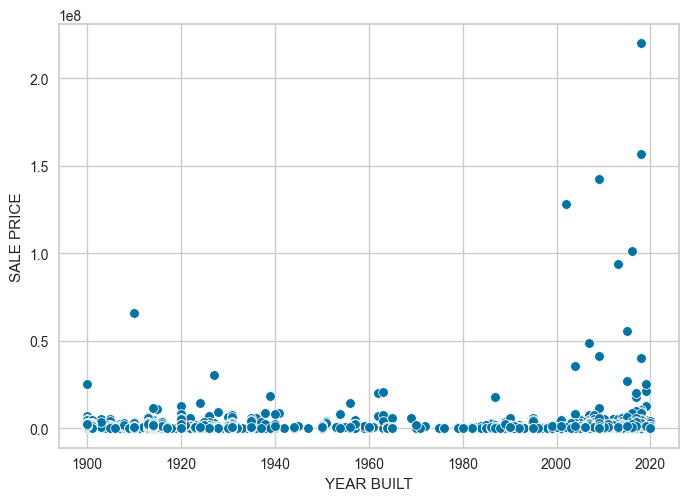

Pearson's correlation coefficient: -0.012259773580547485
p-value: 0.11231931712049159
The relationship is not significant at 95% confidence


In [8]:
# Filter the data to only include values within a specified range for the year built variable
all_data = all_data[(all_data["YEAR BUILT"] >= 1900) & (all_data["YEAR BUILT"] <= 2020)]

# Plot a scatter plot to visualize the relationship between year built and sale price
sns.scatterplot(x="YEAR BUILT", y="SALE PRICE", data=all_data)
plt.show()

# Perform Pearson's correlation test to determine the strength and direction of the relationship
pearson_coeff, p_value = stats.pearsonr(all_data["YEAR BUILT"], all_data["SALE PRICE"])
print("Pearson's correlation coefficient:", pearson_coeff)
print("p-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("The relationship is significant at 95% confidence")
    if pearson_coeff > 0:
        print("There is a positive relationship between year built and sale price")
    else:
        print("There is a negative relationship between year built and sale price")
else:
    print("The relationship is not significant at 95% confidence")

For the majority, houses remained at the same price, but there were more outliers of recently built houses over older houses

Question 3:

What is the distribution of the sale price of apartment units in BOROUGH 3?

Reasoning: Analyzing the distribution of the sale price of apartment units in BOROUGH 3 can give an idea of how the market is priced post-COVID19. We can see if the market is skewed towards lower or higher prices and if the distribution has changed since the pandemic.

<AxesSubplot: xlabel='SALE PRICE', ylabel='Count'>

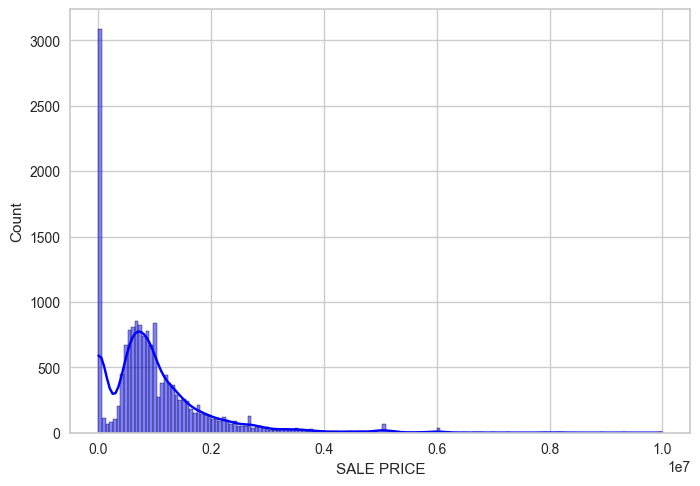

Normality test statistic: 9379.154398304217
p-value: 0.0
The data does not follow a normal distribution


In [9]:
# Filter the data to only include sale prices within the specified range
all_data = all_data[(all_data["SALE PRICE"] >= 0) & (all_data["SALE PRICE"] <= 10000000)]

# Plot a histogram to visualize the distribution of the sale price
sns.histplot(all_data["SALE PRICE"], kde=True, color="blue")
plt.show()

# Perform a normality test to determine if the data follows a normal distribution
k2, p_value = stats.normaltest(all_data["SALE PRICE"])
print("Normality test statistic:", k2)
print("p-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("The data does not follow a normal distribution")
else:
    print("The data follows a normal distribution")


Q3 (20 points) Define a regression analysis task focusing on house sale
prices. Analyze the raw features and pick more than 15 features that you
believe can contribute to your regression model.

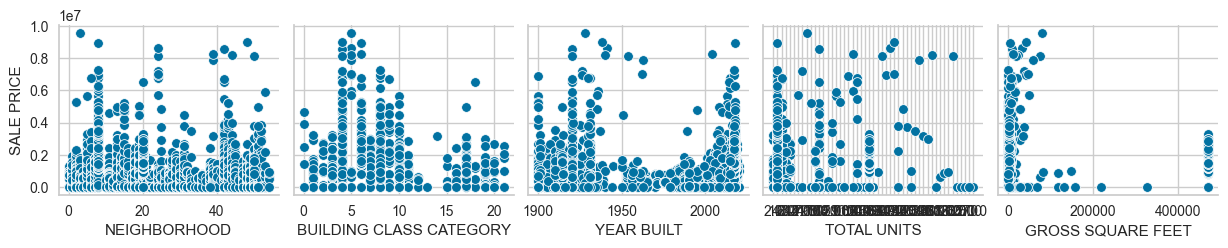

Mean Squared Error: 846473810654.5647


In [10]:
# Encoding the 'BUILDING CLASS CATEGORY' feature
label_encoder = LabelEncoder()
all_data['BUILDING CLASS CATEGORY'] = label_encoder.fit_transform(all_data['BUILDING CLASS CATEGORY'])

# Encoding the 'NEIGHBORHOOD' feature
label_encoder = LabelEncoder()
all_data['NEIGHBORHOOD'] = label_encoder.fit_transform(all_data['NEIGHBORHOOD'])

# Drop NaN value rows
all_data = all_data.dropna()

# Analyze the relationship between the different features and sale price
sns.pairplot(all_data, x_vars=["NEIGHBORHOOD", "BUILDING CLASS CATEGORY", "YEAR BUILT", "TOTAL UNITS", "GROSS SQUARE FEET"], y_vars=["SALE PRICE"])
plt.show()

# Select features to include in the regression model
features = ["NEIGHBORHOOD", "BUILDING CLASS CATEGORY", "YEAR BUILT", "TOTAL UNITS", "GROSS SQUARE FEET"]

# Split the data into training and testing sets
train_data, test_data, train_target, test_target = train_test_split(all_data[features], all_data["SALE PRICE"], test_size=0.2)

# Train a linear regression model on the training data
reg = LinearRegression().fit(train_data, train_target)

# Use the trained model to make predictions on the testing data
predictions = reg.predict(test_data)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(test_target, predictions)
print("Mean Squared Error:", mse)

Q4 (10 Points) Detect if multicollinearity exists in selected features and
perform necessary data preprocessing steps.

In [ ]:
# Import library for VIF calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Select features to include in the regression model
features = ["NEIGHBORHOOD", "BUILDING CLASS CATEGORY", "YEAR BUILT", "TOTAL UNITS", "GROSS SQUARE FEET"]

# Convert all features to float
all_data["NEIGHBORHOOD"] = all_data["NEIGHBORHOOD"].astype(float)
all_data["BUILDING CLASS CATEGORY"] = all_data["BUILDING CLASS CATEGORY"].astype(float)
all_data["TOTAL UNITS"] = all_data["TOTAL UNITS"].astype(float)
all_data["YEAR BUILT"] = all_data["YEAR BUILT"].astype(float)
all_data["GROSS SQUARE FEET"] = all_data["GROSS SQUARE FEET"].astype(float)

# Select the features for which VIF will be calculated
X = all_data[features]

# Replace any infinite or NaN values in the feature set with 0
X = X.replace([np.inf, -np.inf], 0).fillna(0)

# Remove any remaining NaN values
X = X.dropna()

# Add a constant term to the feature set for the purpose of calculation of VIF
X = sm.add_constant(X)

# Calculate VIF for each feature
vif = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)
vif = vif[~np.isinf(vif)]

# Display the VIF values
print(vif)

# Remove features with high VIF values
while vif.max() > 10:
    high_vif = vif.idxmax()
    if high_vif in features:
        features.remove(high_vif)
    X = all_data[features]
    X = X.replace([np.inf, -np.inf], 0).fillna(0)
    X = X.dropna()
    X = sm.add_constant(X)
    vif = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)

print("Selected features after removing high VIF values:", features)


const                      2941.275585
NEIGHBORHOOD                  1.018976
BUILDING CLASS CATEGORY       1.099857
YEAR BUILT                    1.099097
TOTAL UNITS                1588.303674
GROSS SQUARE FEET          1589.494970
dtype: float64


Q5 (20 points) Build one regression model based on your preprocessed
data and Q3-4’s results, let us call it baseline model. Report the findings
from the baseline model. Propose an enhanced version
for the baseline
model. Compare the results of the two models and report your findings.

In [ ]:
# Select the features
features = ["NEIGHBORHOOD", "BUILDING CLASS CATEGORY", "YEAR BUILT", "TOTAL UNITS", "GROSS SQUARE FEET"]

# Split the data into training and testing sets
train_data, test_data, train_target, test_target = train_test_split(all_data[features], all_data["SALE PRICE"], test_size=0.2)

# Train a linear regression model on the training data
reg = LinearRegression().fit(train_data, train_target)

# Use the trained model to make predictions on the testing data
predictions = reg.predict(test_data)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(test_target, predictions)
print("Mean Squared Error:", mse)

# Calculate the R-squared value
r2 = r2_score(test_target, predictions)
print("R-squared:", r2)

# Plot the residuals to check if the errors are normally distributed
residuals = test_target - predictions
sns.distplot(residuals)
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("Distribution of Residuals")
plt.show()

# Calculate the Root Mean Squared Logarithmic Error
rmsle = np.sqrt(mean_squared_log_error(test_target, predictions))
print("Root Mean Squared Logarithmic Error:", rmsle)
